In [6]:
from my_modules.ExpTool import ExpTool

In [8]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

In [9]:
# 실험 객체 생성
exp = ExpTool(p = 0.3,moe = 0.005)


+-------------------------------+
|  Confidence Level:	95.0%	|
|   Margin of Error:	0.5%	|
|           z-score:	1.96	|
|                 p:	0.3	|
+-------------------------------+



## 1. 실험 결과 검증

In [15]:
# b의 샘플 수
b_count = 1000
# 전환된 수 
converted = 400

b_rate = converted/b_count
pvalue = exp.get_pvalue(converted,b_count)
gap = abs((b_rate - exp.p)/exp.p)

print(round(gap,2), round(pvalue,2))

# pvalue가 0.05보다 작으니 귀무가설을 기각

result: lesser then 0.05 :)
0.33 0.0


## 2. B의 목표 전환율 계산

In [16]:
pv = pd.DataFrame()
# 전환율에 따라 달라지는 pvalue 계산

# b군을 1000명까지 모을 경우
b_count = 1000

for converted in range(b_count):
    b_rate = converted/b_count
    pvalue = exp.get_pvalue(converted,b_count, noti = False)
    
    pv.loc[converted, 'b_rate'] = b_rate
    pv.loc[converted, 'pvalue'] = pvalue

pv = pv.reset_index()
pv.columns = ['n','b_rate', 'pvalue']
pv.head(3)

,n,b_rate,pvalue
0,0,0.00,0.00
1,1,0.00,0.00
2,2,0.00,0.00


In [17]:
pvalue_standard = 1-exp.cl
# A보다 유효하게 나쁠 경우의 전환율
bad_rate = pv.loc[(pv.pvalue <= pvalue_standard)&(pv.n <= b_count*exp.p),'b_rate'].tail(1).values[0]
# A보다 유효하게 좋을 경우의 전환율
good_rate = pv.loc[(pv.pvalue <= pvalue_standard)&(pv.n >= b_count*exp.p),'b_rate'].head(1).values[0]

print(bad_rate,good_rate)

0.271 0.329


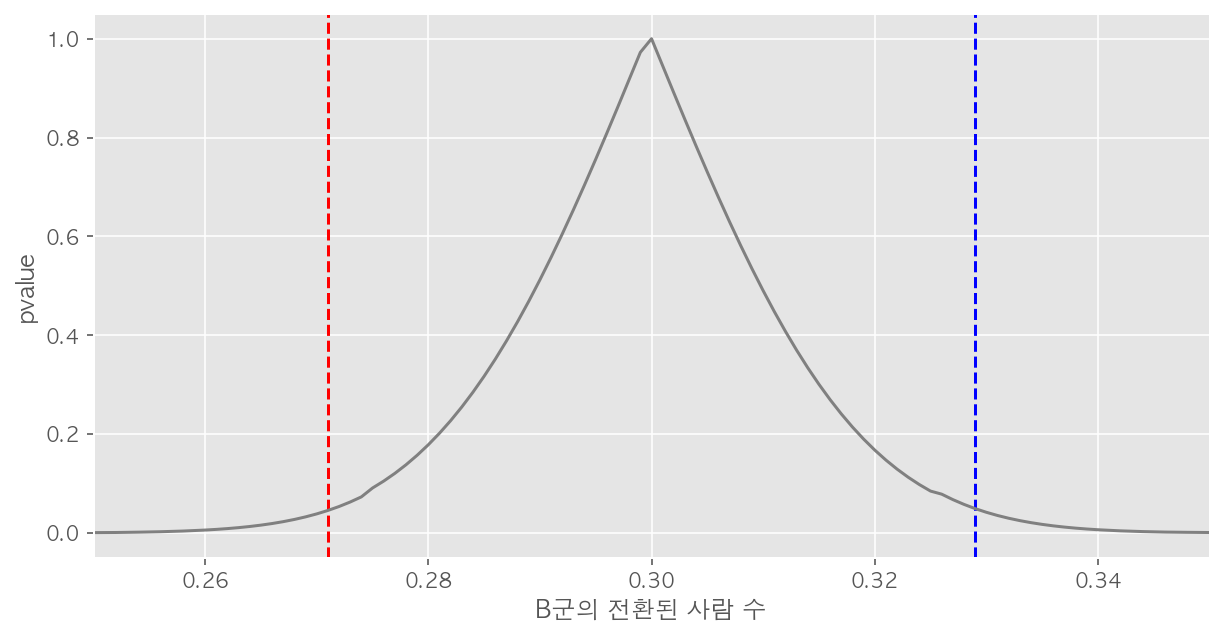

In [20]:
plt.figure(figsize = (10,5))
plt.xlim(0.25,0.35)
plt.xlabel('B군의 전환된 사람 수')

plt.axvline(x = bad_rate, color = 'r', ls = '--')
plt.axvline(x = good_rate, color = 'b', ls = '--')

sns.lineplot(x = 'b_rate', y = 'pvalue', data = pv, color = 'gray')
plt.show()